https://stats.stackexchange.com/questions/13166/rs-lmer-cheat-sheet

In [1]:
library(tidyverse)
library(magrittr)
library(readxl)
library(lmerTest)
library(emmeans)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.4     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract


Loading required package: lme4

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack



Attaching package: ‘lmerTest’


The following object is masked from ‘package:lme4’:

    lmer


The following object is masked from ‘package:stats’:

    step




In [2]:
exp1 = read_xlsx('CLICK-it_WB_cumulative_LCLs.xlsx', sheet=1)

In [3]:
head(exp1)

Gel,Genotype,Sample,Treatment,TAMRA,BetaActin,Background
<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,AA,HG01112,Vehicle,81.42,9.044,0.002
1,AA,HG01112,Vehicle,70.22,8.711,0.002
1,AA,HG01112,Vehicle,68.05,8.363,0.002
1,AA,HG01112,Thapsi,27.08,10.176,0.002
1,AA,HG01112,Thapsi,30.90,10.219,0.002
1,AA,HG01112,Thapsi,35.83,9.784,0.002


In [4]:
exp2 = read_xlsx('CLICK-it_WB_cumulative_LCLs.xlsx', sheet=2)

In [5]:
head(exp2)

Gel,Genotype,Sample,Treatment,TAMRA,BetaActin,Background
<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,AA,HG01932,Vehicle,109.16,8.949,0.431
1,AA,HG01932,Vehicle,109.00,9.232,0.431
1,AA,HG01932,Vehicle,108.88,8.651,0.431
1,AA,HG01932,Thapsi,45.41,8.341,0.431
1,AA,HG01932,Thapsi,47.33,8.482,0.431
1,AA,HG01932,Thapsi,52.55,7.780,0.431


In [6]:
df = rbind(exp1 %>% mutate(Experiment = "Exp1"),
           exp2 %>% mutate(Experiment = "Exp2", Gel = Gel + 3)) %>%
     group_by(Experiment) %>% # or Gel or nothing?!? depends on how gels were developed and quantified
     mutate(TAMRA_ = TAMRA-Background,
            BetaActin_ = BetaActin-Background,
            NormFactor = BetaActin_/max(BetaActin_),
            NormSignal = TAMRA_/NormFactor,
            Experiment = factor(Experiment, levels = c("Exp1", "Exp2")),
            Genotype = factor(Genotype, levels = c("AA", "CC", "EIF2B2")),
            Treatment = factor(Treatment, levels = c("Vehicle", "Thapsi"))) %>%
     ungroup() %>%
     mutate(Gel = str_c("Gel", Gel)) %>%
     select(Sample, Experiment, Gel, Genotype, Treatment, everything()) %>%
     arrange(Sample, Experiment, Gel)

In [7]:
df

Sample,Experiment,Gel,Genotype,Treatment,TAMRA,BetaActin,Background,TAMRA_,BetaActin_,NormFactor,NormSignal
<chr>,<fct>,<chr>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GM20073,Exp1,Gel3,EIF2B2,Vehicle,37.47,14.956,0.002,37.47,14.954,0.8352,44.86
GM20073,Exp1,Gel3,EIF2B2,Vehicle,50.42,16.945,0.002,50.41,16.943,0.9463,53.27
GM20073,Exp1,Gel3,EIF2B2,Vehicle,47.93,17.154,0.002,47.93,17.152,0.9580,50.03
GM20073,Exp1,Gel3,EIF2B2,Thapsi,37.37,17.906,0.002,37.37,17.904,1.0000,37.37
GM20073,Exp1,Gel3,EIF2B2,Thapsi,33.91,17.577,0.002,33.90,17.575,0.9816,34.54
GM20073,Exp1,Gel3,EIF2B2,Thapsi,26.18,15.463,0.002,26.17,15.461,0.8636,30.31
GM20074,Exp2,Gel6,EIF2B2,Vehicle,66.83,7.311,0.039,66.80,7.272,0.3432,194.64
GM20074,Exp2,Gel6,EIF2B2,Vehicle,63.28,13.535,0.039,63.24,13.496,0.6369,99.29
GM20074,Exp2,Gel6,EIF2B2,Vehicle,71.08,17.664,0.039,71.04,17.625,0.8317,85.42


In [8]:
df %>% write_csv("CLICK-it_WB_cumulative_LCLs.csv")

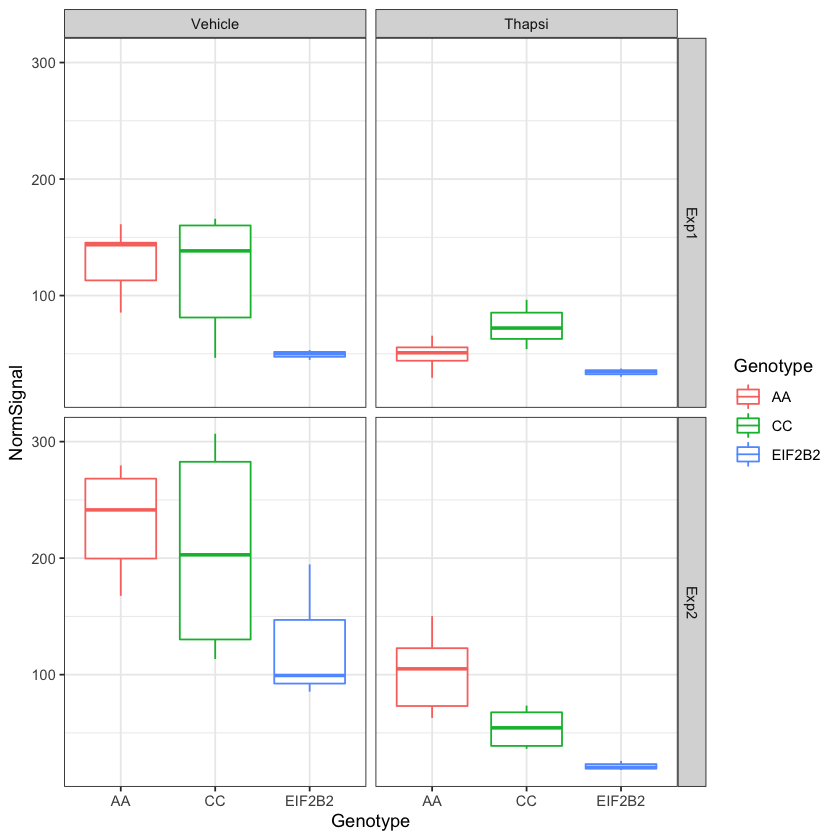

In [9]:
ggplot(df, aes(x=Genotype, y=NormSignal, col=Genotype)) + geom_boxplot() + facet_grid(rows=vars(Experiment), cols=vars(Treatment)) + theme_bw()

In [10]:
lm.full = lmer(NormSignal ~ Genotype * Treatment + (1 | Sample), data = df)

In [11]:
fixef(lm.full)

(Intercept)                     GenotypeCC 
                       181.301                        -17.975 
                GenotypeEIF2B2                TreatmentThapsi 
                       -93.381                       -105.479 
    GenotypeCC:TreatmentThapsi GenotypeEIF2B2:TreatmentThapsi 
                         6.182                         45.359

In [12]:
ranef(lm.full)

$Sample
        (Intercept)
GM20073     -14.342
GM20074      14.342
HG01112     -22.629
HG01125     -46.194
HG01142      -5.166
HG01435     -24.682
HG01565      57.282
HG01572     -27.434
HG01932      64.368
HG02260       4.454

with conditional variances for “Sample” 

In [13]:
summary(lm.full)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: NormSignal ~ Genotype * Treatment + (1 | Sample)
   Data: df

REML criterion at convergence: 574.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.4369 -0.4894  0.0076  0.4059  2.4440 

Random effects:
 Groups   Name        Variance Std.Dev.
 Sample   (Intercept) 1910     43.7    
 Residual             1429     37.8    
Number of obs: 60, groups:  Sample, 10

Fixed effects:
                               Estimate Std. Error      df t value    Pr(>|t|)
(Intercept)                      181.30      24.43    8.62    7.42 0.000050384
GenotypeCC                       -17.97      34.54    8.62   -0.52       0.616
GenotypeEIF2B2                   -93.38      42.31    8.62   -2.21       0.056
TreatmentThapsi                 -105.48      15.43   47.00   -6.84 0.000000015
GenotypeCC:TreatmentThapsi         6.18      21.82   47.00    0.28       0.778
GenotypeEIF2B2:TreatmentThapsi    45.3

In [14]:
anova(lm.full)

,Sum Sq,Mean Sq,NumDF,DenDF,F value,Pr(>F)
,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Genotype,4553,2276,2,7,1.593,0.2690068593931
Treatment,105265,105265,1,47,73.675,0.0000000000348
Genotype:Treatment,4402,2201,2,47,1.541,0.2248662684455


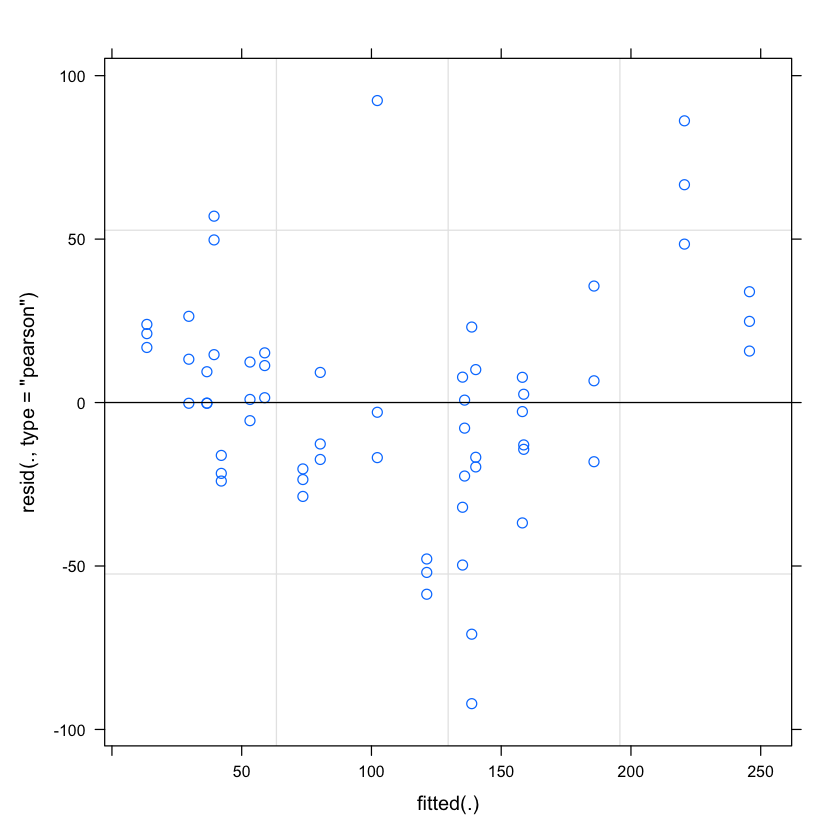

In [15]:
plot(lm.full)

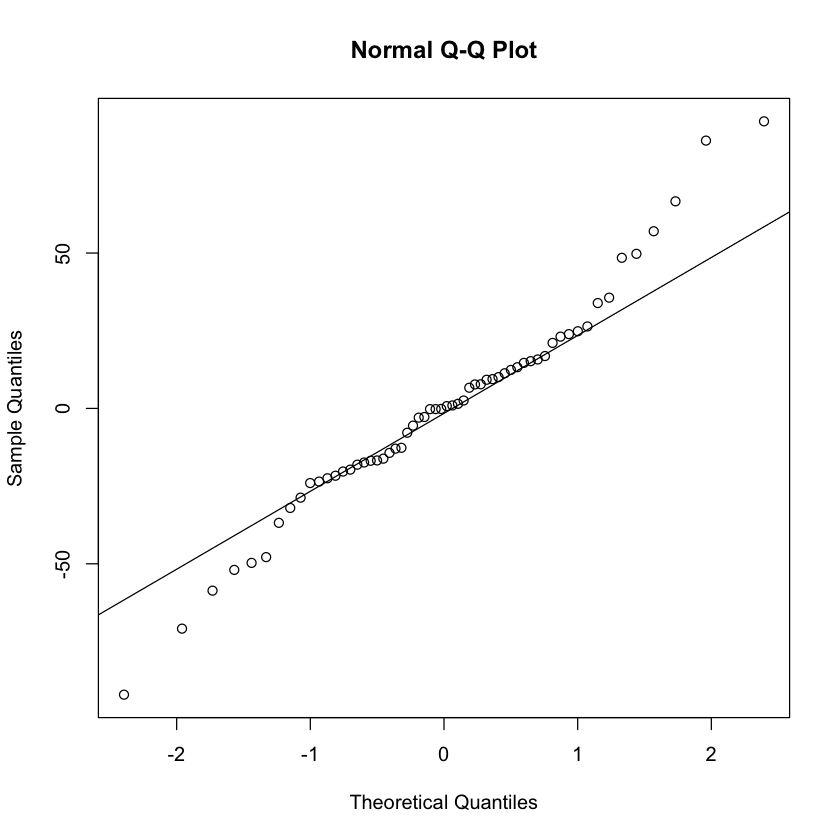

In [16]:
qqnorm(resid(lm.full))
qqline(resid(lm.full))

In [17]:
emmeans(lm.full, list(pairwise ~ Genotype | Treatment), adjust = "tukey")

$`emmeans of Genotype | Treatment`
Treatment = Vehicle:
 Genotype emmean   SE   df lower.CL upper.CL
 AA        181.3 24.4 8.62   125.67      237
 CC        163.3 24.4 8.62   107.70      219
 EIF2B2     87.9 34.5 8.62     9.25      167

Treatment = Thapsi:
 Genotype emmean   SE   df lower.CL upper.CL
 AA         75.8 24.4 8.62    20.19      131
 CC         64.0 24.4 8.62     8.40      120
 EIF2B2     27.8 34.5 8.62   -50.87      106

Degrees-of-freedom method: kenward-roger 
Confidence level used: 0.95 

$`pairwise differences of Genotype | Treatment`
Treatment = Vehicle:
 2           estimate   SE   df t.ratio p.value
 AA - CC         18.0 34.5 8.62 0.520   0.8636 
 AA - EIF2B2     93.4 42.3 8.62 2.207   0.1255 
 CC - EIF2B2     75.4 42.3 8.62 1.782   0.2316 

Treatment = Thapsi:
 2           estimate   SE   df t.ratio p.value
 AA - CC         11.8 34.5 8.62 0.341   0.9382 
 AA - EIF2B2     48.0 42.3 8.62 1.135   0.5190 
 CC - EIF2B2     36.2 42.3 8.62 0.856   0.6799 

Degrees-of-free

In [18]:
emmeans(lm.full, list(pairwise ~ Treatment | Genotype), adjust = "tukey")

$`emmeans of Treatment | Genotype`
Genotype = AA:
 Treatment emmean   SE   df lower.CL upper.CL
 Vehicle    181.3 24.4 8.62   125.67      237
 Thapsi      75.8 24.4 8.62    20.19      131

Genotype = CC:
 Treatment emmean   SE   df lower.CL upper.CL
 Vehicle    163.3 24.4 8.62   107.70      219
 Thapsi      64.0 24.4 8.62     8.40      120

Genotype = EIF2B2:
 Treatment emmean   SE   df lower.CL upper.CL
 Vehicle     87.9 34.5 8.62     9.25      167
 Thapsi      27.8 34.5 8.62   -50.87      106

Degrees-of-freedom method: kenward-roger 
Confidence level used: 0.95 

$`pairwise differences of Treatment | Genotype`
Genotype = AA:
 2                estimate   SE df t.ratio p.value
 Vehicle - Thapsi    105.5 15.4 47 6.835   <.0001 

Genotype = CC:
 2                estimate   SE df t.ratio p.value
 Vehicle - Thapsi     99.3 15.4 47 6.435   <.0001 

Genotype = EIF2B2:
 2                estimate   SE df t.ratio p.value
 Vehicle - Thapsi     60.1 21.8 47 2.755   0.0083 

Degrees-of-freedom me